In [1]:
%load_ext autoreload
%autoreload 2
import random
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_NQueens, plot_evolution

# Local Search: Genetic Algorithm

## 1.Genrating Phrases

In this section we consider a toy problem: generating a target phrases (e.g. "genetic algorithm") from an initial polupation of random strings. Assume the length of the target is known.

Problem Formulation: 

1. Direct Representation: just strings.
2. Exponential Search Space: $m^l$ where $m$ is the size of the alphabet (set of characters in our interest) and $l$ is the length of the string.

Now that we want to solve it with GA:
1. Chromesome: directly use the string itself.
2. Fitness: how match/close an individual is to the target.
3. Mating: combine two strings in someway to generate a new one.

The following cells will walk you through this problem to show the basic idea of GA

In [2]:
# setting up the problem
target = 'Genetic Algorithm'
u_case = [chr(x) for x in range(65, 91)]
l_case = [chr(x) for x in range(97, 123)]
gene_pool = u_case + l_case + [' '] # all English chracters and white space

def init_population(pop_size, gene_pool, state_length):
    """
    Randomly initialize a population for genetic algorithm
        pop_size  :  Number of individuals in population
        gene_pool   :  List of possible values for individuals
        state_length:  The length of each individual
    """

    population = []
    for _ in range(pop_size):
        new_individual = "".join(random.choices(gene_pool, k=state_length))
        population.append(new_individual)

    return population

# test
init_pop = init_population(10, gene_pool, len(target))
init_pop

['CRPxhBCGinZ eqzYK',
 'zubKTVGUDLntKveEV',
 'zgfLzXxlxiApfPzdH',
 'ucdKKVCTlFGaVhjwP',
 'irTGgTfKtCyynTaNz',
 'aVcGqfoGXCnDzhbph',
 'QgOoLBoAwsuESERWn',
 'XewIfXwhGitRVkZyA',
 'MoxEYGjawBtoqKLdP',
 'vuAjAYlKTRCFxHtJP']

In [124]:
# now refactor things into a *Problem* abstraction
# you can directly reuse what you have implemented above
from abc import ABC, abstractmethod

class GAProblem(ABC):
    @abstractmethod
    def init_population(self, pop_size): pass

    @abstractmethod
    def fitness(self, sample): pass

    @abstractmethod
    def reproduce(self, population): pass

    @abstractmethod
    def replacement(self, old, new): pass

class PhraseGeneration(GAProblem):
    def __init__(self, target, alphabet):
        self.target = target
        self.alphabet = alphabet

    def init_population(self, pop_size):
        population = []
        for _ in range(pop_size):
            new_i = ''.join(random.choices(self.alphabet, k=len(self.target)))
            population.append(new_i)
        return population

    def fitness(self, sample):
        score = 0
        for i in range(len(sample)):
            if sample[i] == self.target[i]:
                score += 1 
        return score
    
    def reproduce(self, population, mutation_rate):
        """
        TODO: generate the next generation of population

        hint: make a new individual with 
        
        mutate(recombine(*select(2, population, fitness_fn)), gene_pool, pmut)

        """
        pop_size = len(population)
        scores = []
        for i in population:
            scores.append(self.fitness(i))
        scores = np.argsort(np.array(scores))
        population = np.array(population)
        parents = population[scores[-2:]].tolist()
        
        children = []
        for i in range(pop_size):
            r = random.randrange(0, len(parents[0]))
            child = parents[0][:r] + parents[1][r:]
        
            if random.uniform(0, 1) >= mutation_rate:
                children.append(child)
                continue
            n = len(child)
            g = len(self.alphabet)
            c = random.randrange(0, n)
            r = random.randrange(0, g)
        
            children.append(child[:c] + self.alphabet[r] + child[c+1:])
        return children
    
    def replacement(self, old, new):
        """
        You can use your own strategy, for example retain some solutions from the old population
        """
        return new

def genetic_algorithm(
        problem: GAProblem, 
        ngen, n_init_size, mutation_rate, 
        log_intervel=1000
    ):

    population = problem.init_population(n_init_size)
    best = max(population, key=problem.fitness)
    history = [(0, list(map(problem.fitness, population)))]

    for gen in range(ngen):
        next_gen    = problem.reproduce(population, mutation_rate)
        population  = problem.replacement(population, next_gen)

        if gen % log_intervel == 0:
            current_best = max(population, key=problem.fitness)
            if problem.fitness(current_best) > problem.fitness(best): best = current_best
            print(f"Generation: {gen}/{ngen},\tBest: {best},\tFitness={problem.fitness(best)}")         
            history.append((gen, list(map(problem.fitness, population))))
    
    history.append((ngen-1, list(map(problem.fitness, population))))
    return best, history

In [5]:
# now set up the parameters
ngen = 1200
max_population = 120
mutation_rate = 0.08

u_case = [chr(x) for x in range(65, 91)]
l_case = [chr(x) for x in range(97, 123)]
gene_pool = u_case + l_case + [' ']+[str(x) for x in range(0,10)]

sid = 12011125 #TODO:  replace this with your own sid
target = f"Genetic Algorithm by {sid}" 
alphabet = gene_pool # TODO: fix this: what is the search space now?

problem = PhraseGeneration(target, alphabet)

# and run it
solution, history = genetic_algorithm(problem, ngen, max_population, mutation_rate)
solution

Generation: 0/1200,	Best: GhGer1tqyj76TYZQEnNIDgwrtYaeU,	Fitness=2
Generation: 100/1200,	Best: GfwetiqHrlXorWtMC byt12h11PeU,	Fitness=15
Generation: 200/1200,	Best: Gf1etiq rlgorWtMh by 12h11P25,	Fitness=20
Generation: 300/1200,	Best: GB1etiq rlgorithm by 12h11125,	Fitness=24
Generation: 400/1200,	Best: GB1etic Qlgorithm by 12011125,	Fitness=26
Generation: 500/1200,	Best: Ge1etic Qlgorithm by 12011125,	Fitness=27
Generation: 600/1200,	Best: Getetic Algorithm by 12011125,	Fitness=28
Generation: 700/1200,	Best: Genetic Algorithm by 12011125,	Fitness=29
Generation: 800/1200,	Best: Genetic Algorithm by 12011125,	Fitness=29
Generation: 900/1200,	Best: Genetic Algorithm by 12011125,	Fitness=29
Generation: 1000/1200,	Best: Genetic Algorithm by 12011125,	Fitness=29
Generation: 1100/1200,	Best: Genetic Algorithm by 12011125,	Fitness=29


'Genetic Algorithm by 12011125'

In [95]:
# visualize the evolution of the polulation
bins = np.linspace(0, problem.max_fitness, problem.max_fitness+1)
plot_evolution(history, bins)
bins

AttributeError: 'PhraseGeneration' object has no attribute 'max_fitness'

## 2. N-Queens Problem

It is possible to solve the N-Queens problem with slight modifications.

For the problem:

1. Direct Representation: placement of queens.
2. Search Space: $n^n$, if we don't use any constraints.

To use GA:

Actually a new fitness function is the minimum modification you need for this problem.

Others are alomost the same as the previous problem.

In [45]:
a = [[1,2],[0,4],[3,6]]
b = [i[1] for i in a]
b

[2, 4, 6]

In [159]:
class NQueensProblem(GAProblem):
    def __init__(self, n):
        self.n = n
        self.max_fitness =  n*(n-1)//2 # max number if non-attacking pairs

        
    def init_population(self, pop_size):
        population = []
        def init_queen(n):
            q = []
            while len(q) < n:
                r = random.randint(0,n-1)
                if r not in q:
                    q.append(r)
            return q
                
        for _ in range(pop_size):
            queens_x = init_queen(self.n)
            queens_y = init_queen(self.n)
            queens = []
            for i in range(n):
                queens.append([queens_x[i],queens_y[i]])
            queens.sort()
            population.append(queens)
        
        return population
    
    def fitness(self, queens):
        scores = 0
        for i in range(len(queens)):
            for j in range(i+1, len(queens)):
                queen1 = queens[i]
                queen2 = queens[j]
                if queen1 != queen2 and abs(queen1[0]-queen2[0])!=abs(queen1[1]-queen2[1]) and queen1[1]!=queen2[1]:
                    scores += 1
        return scores
                
    def reproduce(self, population, mutation_rate):
        pop_size = len(population)
        
        def get_parents(population):
            scores = []
            for individual in population:
                scores.append(self.fitness(individual))
            pick1 = random.randint(0, sum(scores))
            pick2 = random.randint(0, sum(scores))
            i = 0
            while pick1>scores[i]:
                pick1 -= scores[i]
                i += 1
            dad = population[i]
            i = 0
            while pick2>scores[i]:
                pick2 -= scores[i]
                i += 1
            mom = population[i]
            return dad, mom
        
        dad, mom = get_parents(population)
        
        def get_children(dad, mom, pop_size):
            children = []
            for _ in range(pop_size):
                index = random.randrange(0, len(dad))
                dad[:index].extend(mom[index:])
                child = dad
        
                if random.uniform(0, 1) >= 0.8:
                    children.append(child)
                    continue
                for index in range(0, random.randint(0,5)):
                    index = random.randrange(0, len(child))
                    gene = [index, random.randint(0, len(child))]
                    child[index] = gene
                children.append(child)
            return children
            
        children = get_children(dad, mom, pop_size)
        
        return children
        
    def replacement(self, old, new):
#         l = len(old)
#         old.extend(new)
#         old.sort()
#         return old[:l]
        return new

    def __repr__(self):
        return f"{self.n}-Queens Problem"

In [160]:
from utils import plot_NQueens
ngen = 10000
init_size = 120
mutation_rate = 0.08

n = 8
problem = NQueensProblem(n)
solution, history = genetic_algorithm(problem, ngen, init_size, mutation_rate)

Generation: 0/10000,	Best: [[0, 0], [1, 5], [2, 7], [3, 2], [4, 4], [5, 6], [6, 1], [7, 3]],	Fitness=27
Generation: 1000/10000,	Best: [[0, 0], [1, 5], [2, 7], [3, 2], [4, 4], [5, 6], [6, 1], [7, 3]],	Fitness=27
Generation: 2000/10000,	Best: [[0, 0], [1, 5], [2, 7], [3, 2], [4, 4], [5, 6], [6, 1], [7, 3]],	Fitness=27
Generation: 3000/10000,	Best: [[0, 0], [1, 5], [2, 7], [3, 2], [4, 4], [5, 6], [6, 1], [7, 3]],	Fitness=27
Generation: 4000/10000,	Best: [[0, 0], [1, 5], [2, 7], [3, 2], [4, 4], [5, 6], [6, 1], [7, 3]],	Fitness=27
Generation: 5000/10000,	Best: [[0, 0], [1, 5], [2, 7], [3, 2], [4, 4], [5, 6], [6, 1], [7, 3]],	Fitness=27
Generation: 6000/10000,	Best: [[0, 0], [1, 5], [2, 7], [3, 2], [4, 4], [5, 6], [6, 1], [7, 3]],	Fitness=27
Generation: 7000/10000,	Best: [[0, 0], [1, 5], [2, 7], [3, 2], [4, 4], [5, 6], [6, 1], [7, 3]],	Fitness=27
Generation: 8000/10000,	Best: [[0, 0], [1, 5], [2, 7], [3, 2], [4, 4], [5, 6], [6, 1], [7, 3]],	Fitness=27
Generation: 9000/10000,	Best: [[0, 0], [

In [170]:
class NQueensProblem2(GAProblem):
    def __init__(self, n):
        self.n = n
        self.max_fitness =  n*(n-1)//2 # max number if non-attacking pairs

        
    def init_population(self, pop_size):
        population = []
                
        for _ in range(pop_size):
            i = 0
            queens = []
            while i<n:
                queen = [random.randint(0, n-1),random.randint(0, n-1)]
                if queen not in queens: 
                    queens.append(queen)
                    i += 1
            population.append(queens)
        
        return population
    
    def fitness(self, queens):
        scores = 0
        for i in range(len(queens)):
            for j in range(i+1, len(queens)):
                queen1 = queens[i]
                queen2 = queens[j]
                if queen1 != queen2 and abs(queen1[0]-queen2[0])!=abs(queen1[1]-queen2[1]) and queen1[0]!=queen2[0] and queen1[1]!=queen2[1]:
                    scores += 1
        return np.round(scores ** 1.5)
                
    def reproduce(self, population, mutation_rate):
        pop_size = len(population)
        
        def get_parents(population):
            scores = []
            for individual in population:
                scores.append(self.fitness(individual))
            pick1 = random.randint(0, sum(scores))
            pick2 = random.randint(0, sum(scores))
            i = 0
            while pick1>scores[i]:
                pick1 -= scores[i]
                i += 1
            dad = population[i]
            i = 0
            while pick2>scores[i]:
                pick2 -= scores[i]
                i += 1
            mom = population[i]
            return dad, mom
        
        dad, mom = get_parents(population)
        
        def get_children(dad, mom, pop_size):
            children = []
            for _ in range(pop_size):
                index = random.randrange(0, len(dad))
                dad[:index].extend(mom[index:])
                child = dad
        
                if random.uniform(0, 1) >= 0.3:
                    children.append(child)
                    continue
                for index in range(0, random.randint(0,5)):
                    index = random.randrange(0, len(child))
                    gene = [index, random.randint(0, len(child))]
                    child[index] = gene
                children.append(child)
            return children
            
        children = get_children(dad, mom, pop_size)
        
        return children
        
    def replacement(self, old, new):
        l = len(old)
        old.extend(new)
        scores = []
        for o in old:
            scores.append(self.fitness(o))
        arg = np.argsort(scores)
        old = np.array(old)
        old = old[arg[-l:]]
        return old.tolist()
#         return new

    def __repr__(self):
        return f"{self.n}-Queens Problem"

In [171]:
from utils import plot_NQueens
ngen = 50000
init_size = 300
mutation_rate = 0.08

n = 8
problem = NQueensProblem2(n)
solution, history = genetic_algorithm(problem, ngen, init_size, mutation_rate)

Generation: 0/50000,	Best: [[2, 0], [5, 0], [5, 6], [7, 3], [0, 1], [4, 3], [2, 2], [3, 5]],	Fitness=110.0
Generation: 1000/50000,	Best: [[0, 6], [1, 0], [2, 5], [3, 1], [4, 4], [5, 7], [6, 7], [7, 3]],	Fitness=140.0
Generation: 2000/50000,	Best: [[0, 6], [1, 0], [2, 5], [3, 1], [4, 4], [5, 7], [6, 7], [7, 3]],	Fitness=140.0
Generation: 3000/50000,	Best: [[0, 6], [1, 0], [2, 5], [3, 1], [4, 4], [5, 7], [6, 7], [7, 3]],	Fitness=140.0
Generation: 4000/50000,	Best: [[0, 6], [1, 0], [2, 5], [3, 1], [4, 4], [5, 7], [6, 7], [7, 3]],	Fitness=140.0
Generation: 5000/50000,	Best: [[0, 6], [1, 0], [2, 5], [3, 1], [4, 4], [5, 7], [6, 7], [7, 3]],	Fitness=140.0
Generation: 6000/50000,	Best: [[0, 6], [1, 0], [2, 5], [3, 1], [4, 4], [5, 7], [6, 7], [7, 3]],	Fitness=140.0
Generation: 7000/50000,	Best: [[0, 6], [1, 0], [2, 5], [3, 1], [4, 4], [5, 7], [6, 7], [7, 3]],	Fitness=140.0
Generation: 8000/50000,	Best: [[0, 6], [1, 0], [2, 5], [3, 1], [4, 4], [5, 7], [6, 7], [7, 3]],	Fitness=140.0
Generation: 9

F:\BaiduNetdiskWorkspace\pythonCode\ai\Practice7_DDL1111_\Practice7\utils.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


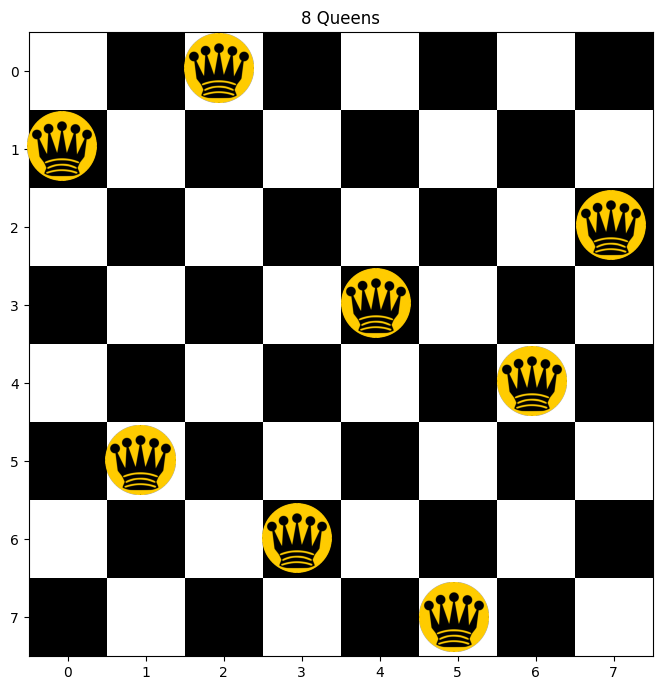

In [151]:
# Example of how to use this function
# plot_NQueens([4, 2, 0, 6, 1, 7, 5, 3])
# replace the parameter with your own results
solution1 = [i[1] for i in solution]
plot_NQueens(solution1)

In [ ]:
# Visualize the evolution of the polulation
bins = np.linspace(0, problem.max_fitness, problem.max_fitness)
plot_evolution(history, bins)